<a href="https://colab.research.google.com/github/twsyas/cdnaep_G2_2022/blob/main/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CDNAEP - PROJETO FINAL (G2)




> **Professores:** Laio Luís e Bruna

> **Aluna:** Yasmin Santana





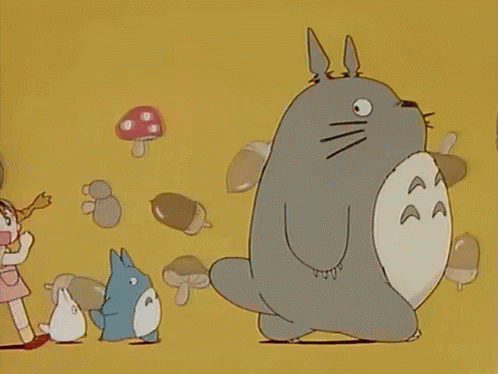

# Pacotes

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #para a construção de gráficos dinâmicos
from tabulate import tabulate #para a construção de tabelas

# Dados

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Foi montado no google drive para ficar melhor para carregar a base de dados.

In [118]:
dadosttk = pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/musicas_tiktok_2022.xlsx')
dadosttk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_musica        239 non-null    object 
 1   nome_artista       239 non-null    object 
 2   nacionalidade      192 non-null    object 
 3   pop_artista        239 non-null    float64
 4   album              239 non-null    object 
 5   pop_musica         239 non-null    float64
 6   genero_musica      239 non-null    object 
 7   dancabilidade      239 non-null    float64
 8   energia            239 non-null    float64
 9   volume             239 non-null    float64
 10  tom                239 non-null    float64
 11  fala               239 non-null    float64
 12  acustica           239 non-null    float64
 13  instrumentalidade  239 non-null    float64
 14  ao_vivo            239 non-null    float64
 15  valencia           239 non-null    float64
 16  tempo              239 non

In [119]:
dadosttk.head()

,nome_musica,nome_artista,nacionalidade,pop_artista,album,pop_musica,genero_musica,dancabilidade,energia,volume,tom,fala,acustica,instrumentalidade,ao_vivo,valencia,tempo,assinatura_tempo,duracao
0,Running Up That Hill (A Deal With God),Kate Bush,Reino Unido,81.0,Hounds Of Love,95.0,Pop,0.629,0.547,-13.123,10.0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.0,298933.0
1,As It Was,Harry Styles,Reino Unido,91.0,As It Was,96.0,Pop,0.520,0.731,-5.338,6.0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4.0,167303.0
2,Sunroof,Nicky Youre,Estados Unidos,73.0,Sunroof,44.0,Pop,0.768,0.716,-5.110,10.0,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4.0,163026.0
3,Heat Waves,Glass Animals,Reino Unido,80.0,Dreamland (+ Bonus Levels),89.0,Alternativa,0.761,0.525,-6.900,11.0,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4.0,238805.0
4,About Damn Time,Lizzo,Estados Unidos,81.0,About Damn Time,92.0,R&B,0.836,0.743,-6.305,10.0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4.0,191822.0


In [120]:
dadosttk['nome_artista'].describe()

count          239
unique         183
top       Doja Cat
freq             8
Name: nome_artista, dtype: object

In [121]:
dadosttk['nacionalidade'].describe()

count                192
unique                31
top       Estados Unidos
freq                 108
Name: nacionalidade, dtype: object

In [122]:
dadosttk['genero_musica'].describe()

count            239
unique            14
top       Eletrônica
freq              67
Name: genero_musica, dtype: object

In [123]:
dadosttk['album'].describe()

count            239
unique           227
top       Planet Her
freq               4
Name: album, dtype: object

In [124]:
dadosttk['pop_artista'].describe()

count    239.000000
mean      65.723849
std       18.047297
min       18.000000
25%       51.500000
50%       67.000000
75%       82.000000
max       95.000000
Name: pop_artista, dtype: float64

In [125]:
dadosttk['energia'].describe()

count    239.000000
mean       0.671669
std        0.141636
min        0.214000
25%        0.585500
50%        0.692000
75%        0.775500
max        0.955000
Name: energia, dtype: float64

# ***Artistas***

## Popularidade dos artistas no tiktok

In [126]:
ranking_artist = dadosttk[['pop_artista', 'nome_artista']]
ranking_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pop_artista   239 non-null    float64
 1   nome_artista  239 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [127]:
 ranking_artist = pd.DataFrame(ranking_artist.groupby(["nome_artista"]).agg({'pop_artista': 'sum'}))
 ranking_artist.head()

,pop_artista
nome_artista,
24kGoldn,74.0
Alex Alexander,184.0
Alex D'Rosso,56.0
Alfons,58.0
Amaarae,64.0


In [128]:
ranking_artist = ranking_artist.sort_values('pop_artista', ascending = False)
print(tabulate(print(tabulate(ranking_artist, headers = 'keys', tablefmt = 'psql')), headers = 'keys', tablefmt = 'psql')) #estilo da tabela

+----------------------+---------------+
| nome_artista         |   pop_artista |
|----------------------+---------------|
| Doja Cat             |           704 |
| Lil Nas X            |           324 |
| The Weeknd           |           279 |
| Dua Lipa             |           264 |
| Ariana Grande        |           261 |
| Pop Smoke            |           249 |
| The Kid LAROI        |           249 |
| Dame Dame            |           240 |
| Coopex               |           240 |
| Drake                |           190 |
| Alex Alexander       |           184 |
| Nito-Onna            |           183 |
| Harry Styles         |           182 |
| Farux                |           180 |
| Justin Bieber        |           180 |
| Ed Sheeran           |           180 |
| Bruno Mars           |           172 |
| Maroon 5             |           170 |
| Olivia Rodrigo       |           170 |
| Jack Harlow          |           168 |
| DaBaby               |           164 |
| Megan Thee Sta

Os três artistas mais populares: Doja Cat, Dame Dame, The Weekend

## Nacionalidade dos artistas

In [129]:
nac = pd.DataFrame(dadosttk.groupby('nacionalidade')['nome_artista'].count()).reset_index()
nac = nac.rename(columns={'nome_artista': 'quantidade de artista'})
nac.head()

,nacionalidade,quantidade de artista
0,Austrália,9
1,Brasil,1
2,Canadá,12
3,Colômbia,2
4,Coreia do Sul,1


In [130]:
px.bar(nac, x='quantidade de artista', y='nacionalidade', color = "nacionalidade") #gráfico de barra dinâmico feito no plotly

Se tirar os EUA, ficará melhor visualizar os outros países, pois os EUA tem a maior quantidade de artistas no tiktok

## Artistas brasileiros

In [131]:
br = dadosttk.loc[(dadosttk['nacionalidade'] == 'Brasil')].reset_index(drop = True)
br = br[['nome_artista','genero_musica']]
br.head()

,nome_artista,genero_musica
0,Anitta,Latina


A Anitta é a única artista brasileira presente na base de dados.


##Artista

In [132]:
rep = pd.DataFrame(dadosttk.groupby('nome_artista')['nome_musica'].count())
rep = rep.sort_values('nome_musica', ascending = False).reset_index()
rep = rep.rename(columns={'nome_artista': 'Nome do artista',
                          'nome_musica':'Repetição'})
rep

,Nome do artista,Repetição
0,Doja Cat,8
1,Dame Dame,5
2,Lil Nas X,4
3,Coopex,4
4,Farux,4
...,...,...
178,JRL,1
179,Jawsh 685,1
180,Jena Rose,1
181,Jnr Choi,1


## Popularidade das músicas dos artistas

In [133]:
pop = pd.DataFrame(dadosttk.groupby('nome_artista')['pop_musica'].count())
pop = pop.sort_values('pop_musica', ascending = False).reset_index()
pop = pop.rename(columns={'nome_artista': 'Nome do artista',
                          'pop_musica':'Popularidade da faixa'})
pop

,Nome do artista,Popularidade da faixa
0,Doja Cat,8
1,Dame Dame,5
2,Lil Nas X,4
3,Coopex,4
4,Farux,4
...,...,...
178,JRL,1
179,Jawsh 685,1
180,Jena Rose,1
181,Jnr Choi,1


In [134]:
px.bar(pop, x='Nome do artista', y='Popularidade da faixa')


Os três artistas com as músicas mais populares são: Doja Cat, Lil Nas X, Fanux.

# **Música**

## Álbum

In [135]:
dfA = dadosttk [['nome_musica', 'album']]
dfA = pd.DataFrame(dfA.groupby('album')['nome_musica'].count()).reset_index()
dfA = dfA.sort_values('nome_musica', ascending = False)
dfA

,album,nome_musica
139,Planet Her,4
168,Shoot For The Stars Aim For The Moon,3
213,Without You,2
8,As It Was,2
129,On My Way,2
...,...,...
82,Hot Pink,1
83,Hounds Of Love,1
84,How Can You Mend A Broken Heart,1
85,I AM WOMAN,1


álbuns com as músicas mais repetidas são: Planet Her, Shoot For The Stars Aim For The Moon, Without You.

## Música com maior duração

In [136]:
dur = dadosttk [["nome_musica", "nome_artista", "tempo", "duracao"]]
dur 

,nome_musica,nome_artista,tempo,duracao
0,Running Up That Hill (A Deal With God),Kate Bush,108.375,298933.0
1,As It Was,Harry Styles,173.930,167303.0
2,Sunroof,Nicky Youre,131.430,163026.0
3,Heat Waves,Glass Animals,80.870,238805.0
4,About Damn Time,Lizzo,108.966,191822.0
...,...,...,...,...
234,The Less I Know The Better,Tame Impala,116.879,216320.0
235,Dandelions,Ruth B.,116.959,233720.0
236,Jimmy Cooks (feat. 21 Savage),Drake,165.921,218365.0
237,Good Looking,Suki Waterhouse,149.971,214800.0


In [154]:
dur = pd.DataFrame(dur\
                   .groupby(
                       ["nome_artista", "nome_musica"]
                            )\
                   .agg(
                       {'duracao': 'sum'}
                        )
                   )
dur = dur\
  .drop_duplicates(keep = False)\
  .sort_values(
      'duracao', ascending = False
      )
dur

,,duracao
nome_artista,nome_musica,
The Weeknd,Blinding Lights,401613.0
Kate Bush,Running Up That Hill (A Deal With God),298933.0
Doja Cat,Freak,284480.0
SZA,Good Days,279204.0
The Prince Karma,Later Bitches,247976.0
...,...,...
VANO 3000,Running Away,111787.0
Disco Lines,Baby Girl,111074.0
DripReport,Skechers,106031.0


## Gêneros populares

In [138]:
gen = dadosttk [["genero_musica", "pop_musica"]]
gen 

,genero_musica,pop_musica
0,Pop,95.0
1,Pop,96.0
2,Pop,44.0
3,Alternativa,89.0
4,R&B,92.0
...,...,...
234,Rock,84.0
235,R&B,90.0
236,Rap,92.0
237,Alternativa,80.0


In [139]:
gen = pd.DataFrame(gen.groupby('genero_musica')['pop_musica'].count()).reset_index()
gen =gen.sort_values('pop_musica', ascending = False)
gen

,genero_musica,pop_musica
3,Eletrônica,67
9,Pop,58
11,Rap,45
13,Trap,21
1,Alternativa,14
10,R&B,12
7,Latina,11
12,Rock,4
0,Afro,2
2,Country,1


In [140]:
px.pie(gen, values='pop_musica', names='genero_musica', title='Percentual de gêneros musicais presentes no tiktok',color='genero_musica',
             color_discrete_map={'Eletrônica':'lightcyan',
                                 'Pop':'cyan',
                                 'Rap':'royalblue',
                                 'Trap':'darkblue',
                                 'Alternativa': 'white',
                                 'R&B': "pastelblue",
                                 'Latina': '#C1DFF0',
                                 'Rock': '#2D848A',
                                 "Afro": '#2D898B',
                                 'Country': '#65B1CD',
                                 'Jazz': '#56C0C8',
                                 'Kpop': '#37A2A9',
                                 'Musical': "#84D6D7"})


Nesse gráfico, foi adicionado uma cor para cada variável. Feito no plotly. Os gêneros de maiores concentrações são o Eletrônica e o Pop.

## Padrão entre as músicas mais populares

Aqui é possível ver que o que mais influência a popularidade das músicas são os artistas, a duração. O volume, a assinatura de tempo, a valência e a acústica não influenciam tanto.

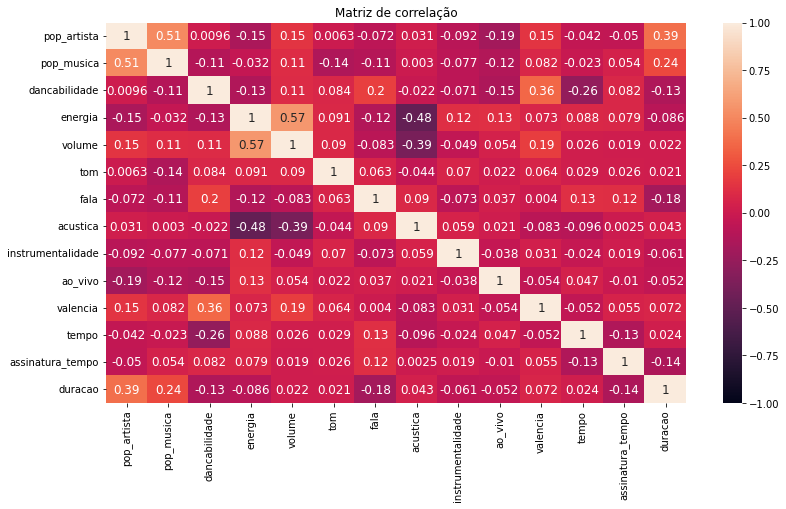

In [141]:
fig = plt.figure(figsize = (13,7)) #tamanho da figura
sns.heatmap(dadosttk.corr(), vmin= -1, vmax = 1, annot=True, annot_kws={"size": 12}, cmap = 'rocket').set(title = 'Matriz de correlação') 
plt.show()

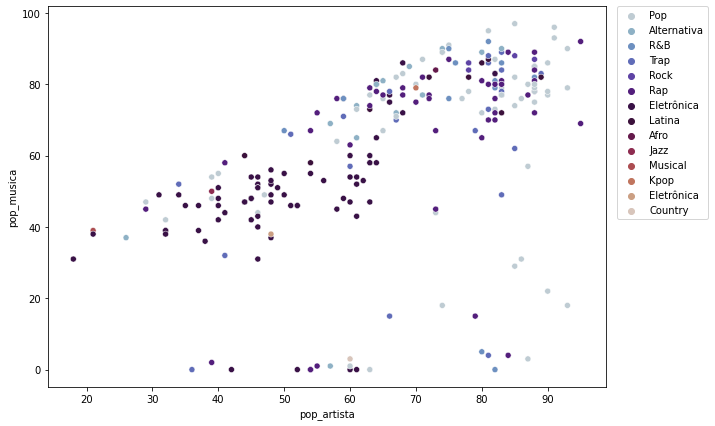

In [142]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'pop_artista', y = 'pop_musica', data = dadosttk, hue = 'genero_musica', palette = 'twilight')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

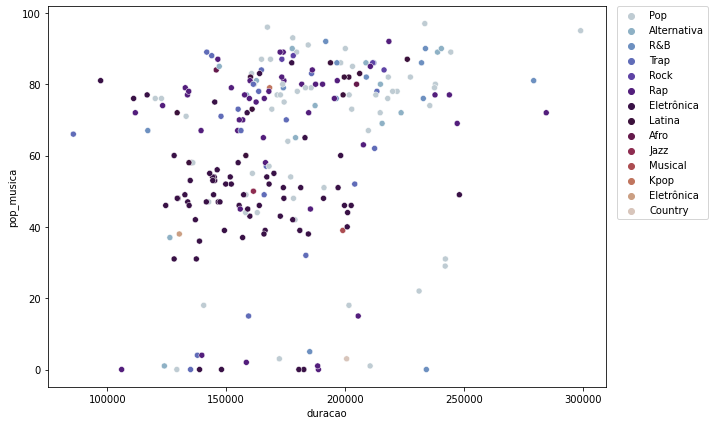

In [143]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'duracao', y = 'pop_musica', data = dadosttk, hue = 'genero_musica', palette = 'twilight')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

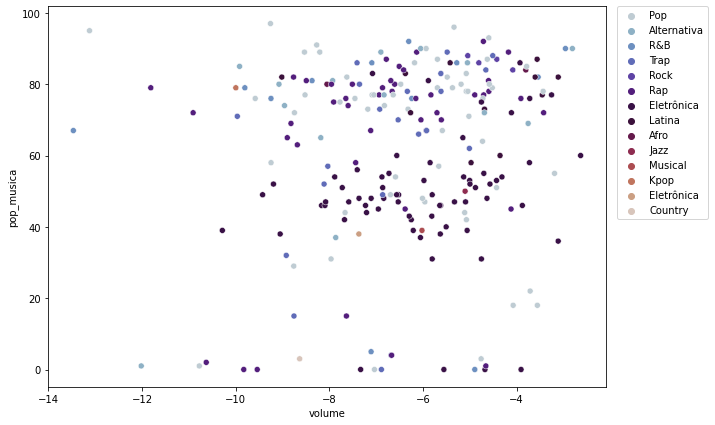

In [144]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'volume', y = 'pop_musica', data = dadosttk, hue = 'genero_musica', palette = 'twilight')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

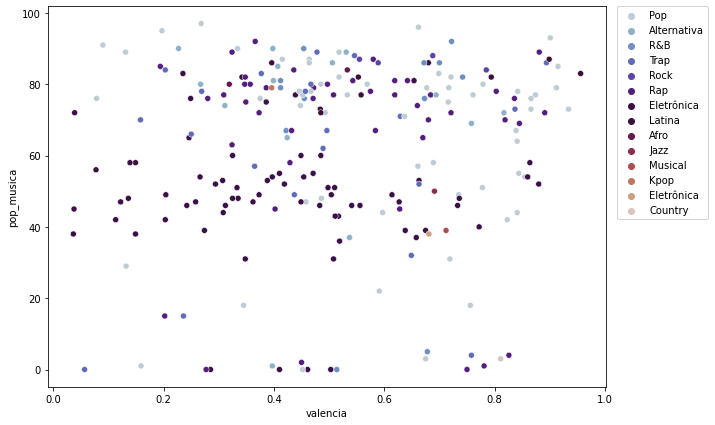

In [145]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'valencia', y = 'pop_musica', data = dadosttk, hue = 'genero_musica', palette = 'twilight')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

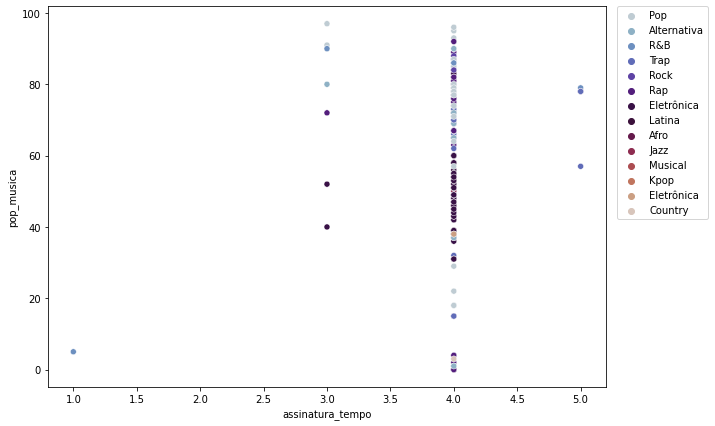

In [146]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'assinatura_tempo', y = 'pop_musica', data = dadosttk, hue = 'genero_musica', palette = 'twilight')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

# Correlação


## Mapa de calor

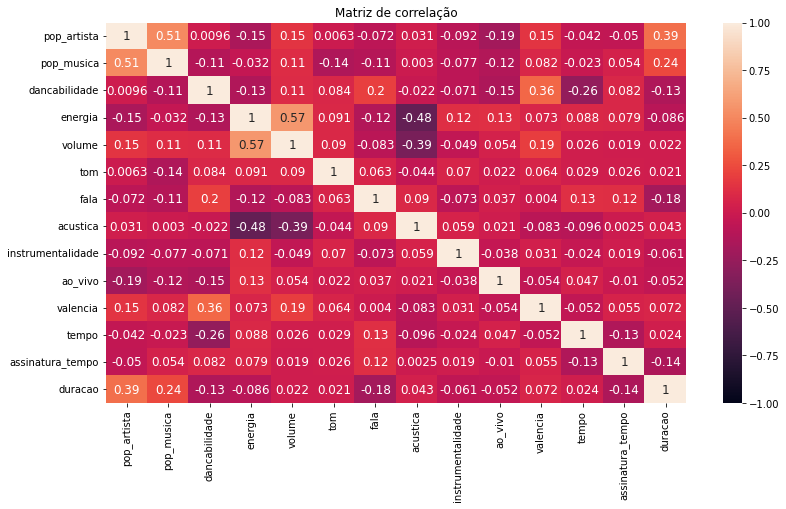

In [147]:
fig = plt.figure(figsize = (13,7)) #tamanho da figura
sns.heatmap(dadosttk.corr(), vmin= -1, vmax = 1, annot=True, annot_kws={"size": 12}, cmap = 'rocket').set(title = 'Matriz de correlação') 
plt.show()


## Gráficos de dispersão

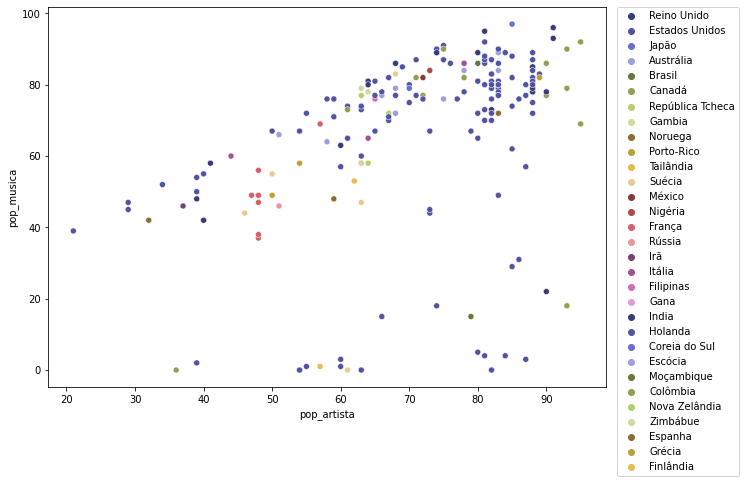

In [148]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'pop_artista', y = 'pop_musica', data = dadosttk, hue = 'nacionalidade', palette = 'tab20b')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

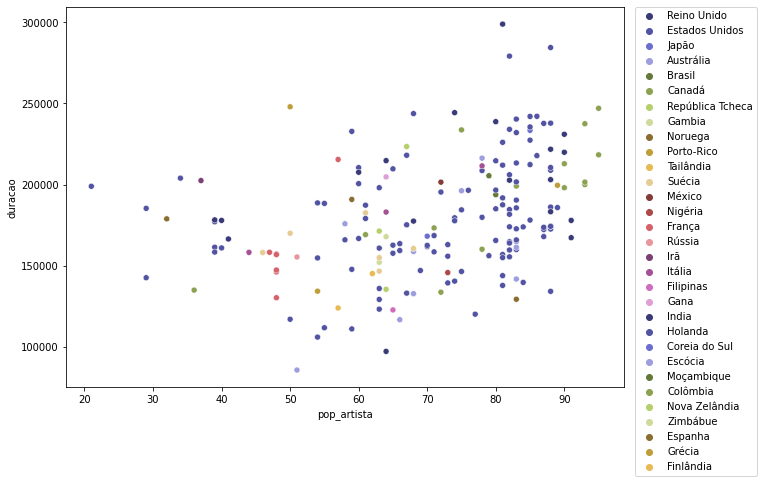

In [149]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'pop_artista', y = 'duracao', data = dadosttk, hue = 'nacionalidade', palette = 'tab20b')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

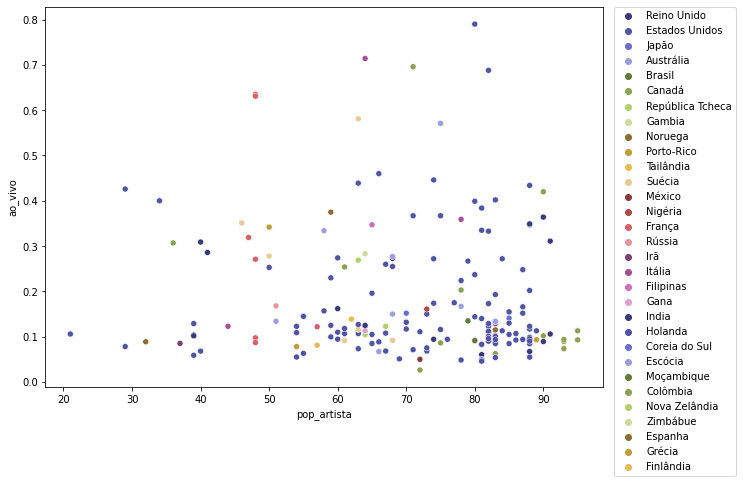

In [150]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'pop_artista', y = 'ao_vivo', data = dadosttk, hue = 'nacionalidade', palette = 'tab20b')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

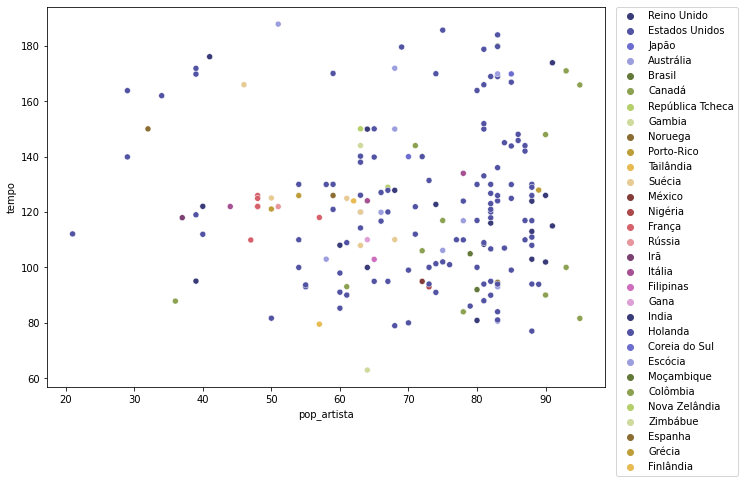

In [151]:
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = 'pop_artista', y = 'tempo', data = dadosttk, hue = 'nacionalidade', palette = 'tab20b')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)

Os gráficos apresentaram respostas em relação às perguntas e ajudaram na visualização dos dados, apesar de alguns estarem meio díficil de se entender.

# Boxplot

In [152]:
dadosttk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_musica        239 non-null    object 
 1   nome_artista       239 non-null    object 
 2   nacionalidade      192 non-null    object 
 3   pop_artista        239 non-null    float64
 4   album              239 non-null    object 
 5   pop_musica         239 non-null    float64
 6   genero_musica      239 non-null    object 
 7   dancabilidade      239 non-null    float64
 8   energia            239 non-null    float64
 9   volume             239 non-null    float64
 10  tom                239 non-null    float64
 11  fala               239 non-null    float64
 12  acustica           239 non-null    float64
 13  instrumentalidade  239 non-null    float64
 14  ao_vivo            239 non-null    float64
 15  valencia           239 non-null    float64
 16  tempo              239 non

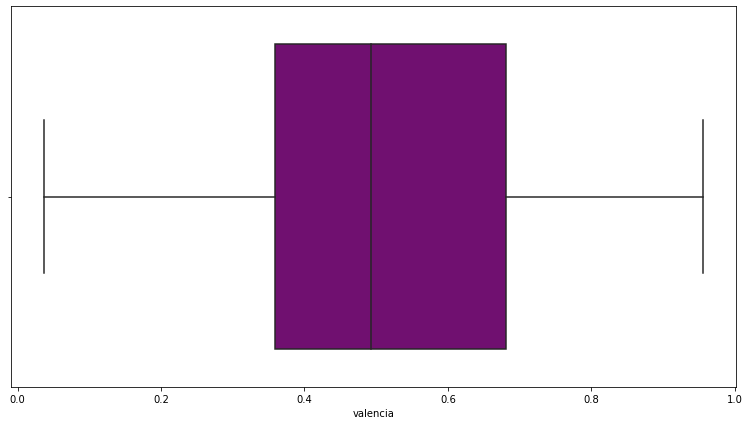

In [175]:
f = plt.figure(figsize = (13,7)) #tamanho da figura
sns.boxplot(data = dadosttk, x = 'valencia', color = 'purple')
plt.show()

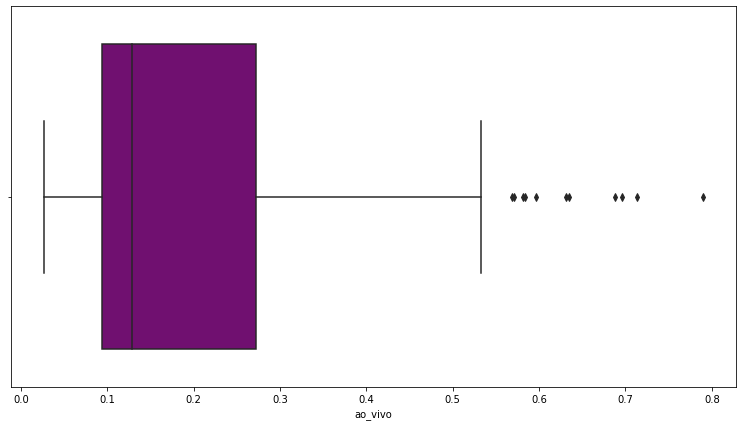

In [172]:
f = plt.figure(figsize = (13,7)) #tamanho da figura
sns.boxplot(data = dadosttk, x = 'ao_vivo', color = 'purple')
plt.show()